## PART 2 of the Plassticc challenge homework: implement classification and clustring on the feature space you created in the previous homework

## this homework is split into 2. In the first part, due by Thursday 9th at noon, you will engineer features from time series. In the second half, due Thursday 16th at noon, you will use those features to find structure in the feature space (unsupervised learning, i.e. clustering) and classify by example with CART (supervised learning with random forest or gradient boosted tree models)

# Classifying astrophysical transients from photometry

## OVERVIEW

The PLAsTiCC challend is a Kaggle challange to classify astrophysical objects (e.g. stars, exploding stars, stars with planets transiting, black holes) based on their time variability in the light emission in 6 different bands. The sampling (the cadence of the observations) is designed to show what the upcming Rubin Observatory LSST (Legacy Survey of Space and Time) will see when it starts observing (in 2023). 

You can refer to this notebook https://www.kaggle.com/michaelapers/the-plasticc-astronomy-starter-kit (written by my good riend Gautham Narayan in fact!) to get started and ingest and preprocess the PLASTiCC challenge data. However, this is written with a class (object oriented) and we have not talked about this syntax in class. If you are not familiar with classes do not worry about it (but you should learn them!). Also I do want you to extract the features yourself. So use it as a guideline, but do not just copy and paste.

Your task is to extract features, i.e. representations of the time series, and run 2 models on these feautes: a cluster model, and a classification tree. 

To limit confusion I removed the first part of the notebook. You can find it in https://github.com/fedhere/MLTSA_FBianco/tree/master/HW5 in the solution notebook


PICKING UP FROM THE LAST HOMEWORK

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pip install kaggle

In [3]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd gdrive

/content/gdrive


In [5]:
cd My\ Drive

/content/gdrive/My Drive


In [6]:
ls kaggle.json

kaggle.json


In [0]:
import json
import os
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']



In [8]:
cd HW5/

/content/gdrive/My Drive/HW5


In [9]:
metadata = pd.read_csv('training_set_metadata.csv')
metadata.head()

,object_id,ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,615,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,713,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,730,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,745,0.189873,-45.586655,328.254458,-68.969298,1,0.3037,0.2813,1.1523,40.7951,0.007,90
4,1124,352.711273,-63.823658,316.922299,-51.059403,1,0.1934,0.2415,0.0176,40.4166,0.024,90


In [10]:
metadata.columns

Index(['object_id', 'ra', 'decl', 'gal_l', 'gal_b', 'ddf', 'hostgal_specz',
       'hostgal_photoz', 'hostgal_photoz_err', 'distmod', 'mwebv', 'target'],
      dtype='object')

In [11]:
print("The metadata dataset contains more information for each time series: (time-series, columns)", metadata.shape)

The metadata dataset contains more information for each time series: (time-series, columns) (7848, 12)


In [0]:
allfeatures2 = pd.read_csv('allfeature_saved.csv')

In [13]:
allfeatures2.head()

,Unnamed: 0,object_id,"(0, 'mean')","(0, 'std')","(0, 'm2')","(0, 'm3')","(0, 'maxs')","(0, 'mins')","(0, 'median')","(0, 'slopes')","(0, 'intercepts')","(0, 'll1')","(0, 'll2')","(0, 'll3')","(1, 'mean')","(1, 'std')","(1, 'm2')","(1, 'm3')","(1, 'maxs')","(1, 'mins')","(1, 'median')","(1, 'slopes')","(1, 'intercepts')","(1, 'll1')","(1, 'll2')","(1, 'll3')","(2, 'mean')","(2, 'std')","(2, 'm2')","(2, 'm3')","(2, 'maxs')","(2, 'mins')","(2, 'median')","(2, 'slopes')","(2, 'intercepts')","(2, 'll1')","(2, 'll2')","(2, 'll3')","(3, 'mean')","(3, 'std')",...,"(3, 'slopes')","(3, 'intercepts')","(3, 'll1')","(3, 'll2')","(3, 'll3')","(4, 'mean')","(4, 'std')","(4, 'm2')","(4, 'm3')","(4, 'maxs')","(4, 'mins')","(4, 'median')","(4, 'slopes')","(4, 'intercepts')","(4, 'll1')","(4, 'll2')","(4, 'll3')","(5, 'mean')","(5, 'std')","(5, 'm2')","(5, 'm3')","(5, 'maxs')","(5, 'mins')","(5, 'median')","(5, 'slopes')","(5, 'intercepts')","(5, 'll1')","(5, 'll2')","(5, 'll3')",ra,decl,gal_l,gal_b,ddf,hostgal_specz,hostgal_photoz,hostgal_photoz_err,distmod,mwebv,target
0,0,615,-3.254554,83.944735,6934.865833,6934.865833,125.182808,-116.913223,-0.080537,0.005676,-0.175947,-84.013092,-88.218652,-1.0,-385.699911,601.787302,355904.026224,355904.026224,660.626343,-1100.440063,-0.170090,0.014032,-0.399902,-80.867915,-80.869998,-1.0,-134.146566,455.121346,203564.138816,203564.138816,611.984558,-681.858887,-0.289021,0.017676,-0.503760,-80.092803,-80.109763,-1.0,-121.103501,335.425053,...,0.020475,-0.583524,-79.226482,-79.290039,-1.0,-55.954592,291.803449,83681.162283,83681.162283,381.953735,-422.184509,-0.163078,0.022343,-0.636786,-78.160027,-78.480261,-1.0,-47.449847,294.779522,85370.493377,85370.493377,378.188141,-422.815094,-0.129163,0.021319,-0.596932,-76.917754,-77.386461,-1.0,349.046051,-61.943836,320.796530,-51.753706,1,0.0000,0.0000,0.0000,NaN,0.017,92
1,1,713,-2.720398,7.113509,49.879128,49.879128,14.509829,-14.735178,-0.052914,-0.041433,1.429423,-45.801483,-49.801325,-1.0,-1.019804,5.712334,32.048070,32.048070,9.129021,-11.715749,0.080189,-0.051648,1.420320,-36.052358,-38.161170,-1.0,-0.794238,5.770738,32.706748,32.706748,10.529041,-10.067919,0.117188,-0.053887,1.481892,-34.410798,-35.611095,-1.0,-0.986966,6.450413,...,-0.050983,1.402038,-38.701863,-41.302700,-1.0,-0.900262,6.406989,40.316483,40.316483,9.827934,-12.286801,0.016870,-0.050464,1.387765,-44.424807,-44.870314,-1.0,-1.794175,7.094073,49.427194,49.427194,14.770886,-14.211164,-0.094281,-0.037903,1.042343,-65.167686,-65.424297,-1.0,53.085938,-27.784405,223.525509,-54.460748,1,1.8181,1.6267,0.2552,45.4063,0.007,88
2,2,730,-0.048080,1.828872,3.298318,3.298318,5.942166,-3.459960,0.039463,-0.001798,0.063840,-101.249926,-101.606902,-1.0,0.141057,1.807229,3.203266,3.203266,5.693109,-3.393080,0.016754,0.003167,-0.080770,-72.910038,-73.012277,-1.0,2.400870,5.559483,30.313471,30.313471,20.994711,-2.848838,-0.343392,0.026905,-0.686084,-63.777334,-65.193298,1.0,3.236164,8.191987,...,0.024491,-0.624531,-66.369632,-66.683538,1.0,4.308728,10.710344,112.462234,112.462234,41.159981,-5.836310,-0.308522,0.022552,-0.563811,-65.239486,-66.161110,1.0,4.539396,13.332758,174.276892,174.276892,47.310059,-19.159811,-0.149763,0.019612,-0.490299,-66.518080,-67.853917,1.0,33.574219,-6.579593,170.455585,-61.548219,1,0.2320,0.2262,0.0157,40.2561,0.021,42
3,3,745,1.797523,4.374445,18.869993,18.869993,18.014029,-3.874349,-0.169349,-0.013089,0.464675,-88.423048,-100.184915,-1.0,5.717394,25.964659,662.124902,662.124902,192.244293,-3.618410,-0.185994,-0.003826,0.105205,-76.313623,-78.932796,-1.0,9.711532,31.957997,1003.075853,1003.075853,220.795212,-2.159753,-0.290606,-0.003878,0.106641,-72.846380,-78.938052,-1.0,14.412924,34.967698,...,-0.003931,0.108112,-67.105516,-78.945375,-1.0,13.134436,33.069053,1074.034376,1074.034376,183.633118,-15.494463,-0.358773,-0.004774,0.131296,-67.067827,-78.924149,-1.0,10.746138,26.060130,666.782529,666.782529,141.513290,-10.249387,-0.306851,-0.002816,0.076043,-64.783463,-77.536999,-

### make sure you deal with missing data

In [0]:
# -- personally I choose to drop the feature 
allfeatures2 = allfeatures2.replace([np.inf, -np.inf], np.nan).dropna(axis=1)


# PART II: I already guided you  through some of these tasks, but sort of "blindly". Start from here for part 2: we will reperform some of the tasks more thoughtfully (and correctly) and you will apply both clustering and classification to the PLASTiCC challenge data

# PART IIA : Preprocessing


## Task II.1: Preprocess your features by scaling them along the feature axis

Scale your training and test sets to remove the correlation: each feature is preprocessed so that it is mean=0 and standard deviation =1 - we will talk about it in class but make sure you deliver in this notebook the scaled features as below. Save the original mean and standard deviation for all features

**Deliverable II.1: the means and standard deviation arrays and the scaled features array**

**NOTE I HAD A MISTAKE IN THE NOTEBOOK LAST WEEK! you want to scale for the full set at once, and save the values of mean and standard deviation of the full set so you can preprocess future observations that are in nither sets the same way**



In [0]:
X = allfeatures2.iloc[:,:-1].values
y = allfeatures2.iloc[:,-1].values

In [16]:
print(allfeatures2)

      Unnamed: 0  object_id  (0, 'mean')  ...  hostgal_photoz_err  mwebv  target
0              0        615    -3.254554  ...              0.0000  0.017      92
1              1        713    -2.720398  ...              0.2552  0.007      88
2              2        730    -0.048080  ...              0.0157  0.021      42
3              3        745     1.797523  ...              1.1523  0.007      90
4              4       1124     0.660948  ...              0.0176  0.024      90
...          ...        ...          ...  ...                 ...    ...     ...
7843        7843  130739978     1.286655  ...              0.0000  0.013      65
7844        7844  130755807    24.635243  ...              1.1146  0.136      90
7845        7845  130762946    -0.282914  ...              0.0000  0.430      16
7846        7846  130772921     3.374208  ...              0.0000  0.034      65
7847        7847  130779836   812.700937  ...              0.0000  0.091       6

[7848 rows x 83 columns]


In [0]:
print(X.shape)


(7848, 82)


what do X and y look like?

In [17]:
print(X)

[[ 0.00000000e+00  6.15000000e+02 -3.25455438e+00 ...  0.00000000e+00
   0.00000000e+00  1.70000000e-02]
 [ 1.00000000e+00  7.13000000e+02 -2.72039787e+00 ...  1.62670000e+00
   2.55200000e-01  7.00000000e-03]
 [ 2.00000000e+00  7.30000000e+02 -4.80804167e-02 ...  2.26200000e-01
   1.57000000e-02  2.10000000e-02]
 ...
 [ 7.84500000e+03  1.30762946e+08 -2.82914231e-01 ...  0.00000000e+00
   0.00000000e+00  4.30000000e-01]
 [ 7.84600000e+03  1.30772921e+08  3.37420779e+00 ...  0.00000000e+00
   0.00000000e+00  3.40000000e-02]
 [ 7.84700000e+03  1.30779836e+08  8.12700937e+02 ...  0.00000000e+00
   0.00000000e+00  9.10000000e-02]]


In [18]:
print(y)


[92 88 42 ... 16 65  6]


In [0]:
featuremeans = mean(allfeatures2)
featurestd = std(allfeatures2)
print("saved means and standard deviation arrays", featuremeans, featurestd)
print("number of observcations {}, features {}, means {}, standard deviations {}".format(
   *X.shape, featuremeans.shape[0], featurestd.shape[0]))

saved means and standard deviation arrays Unnamed: 0            3.923500e+03
object_id             4.810375e+07
(0, 'mean')           3.927376e+01
(0, 'std')            2.182559e+02
(0, 'm2')             1.174025e+08
                          ...     
hostgal_specz         2.544364e-01
hostgal_photoz        3.578845e-01
hostgal_photoz_err    1.556947e-01
mwebv                 8.195260e-02
target                6.089539e+01
Length: 83, dtype: float64 Unnamed: 0            2.265522e+03
object_id             4.347087e+07
(0, 'mean')           2.114341e+03
(0, 'std')            1.131497e+04
(0, 'm2')             1.023293e+10
                          ...     
hostgal_specz         3.300318e-01
hostgal_photoz        5.455168e-01
hostgal_photoz_err    3.003482e-01
mwebv                 1.505881e-01
target                2.876615e+01
Length: 83, dtype: float64
number of observcations 7848, features 82, means 83, standard deviations 83


In [19]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
print("scaled training data feature mean and standard deviations: ", 
      X_scaled.mean(axis=0), X_scaled.std(axis=0))



scaled training data feature mean and standard deviations:  [ 0.00000000e+00  0.00000000e+00  2.71614196e-18  2.71614196e-18
  2.71614196e-18  2.71614196e-18  5.43228391e-18 -1.81076130e-18
  1.44860904e-17  1.44860904e-17  1.81076130e-18  1.15888723e-16
  6.51874070e-17  8.60111619e-18 -2.94248712e-18 -3.62152261e-18
 -3.62152261e-18 -9.95918717e-18  1.35807098e-17 -8.69165426e-17
 -2.35398970e-17 -9.05380652e-18 -1.15888723e-16 -1.15888723e-16
 -2.53506583e-17 -2.71614196e-18 -5.77180166e-18 -1.81076130e-18
 -1.81076130e-18  1.04118775e-17  1.81076130e-18  7.24304522e-18
  1.26753291e-17  1.81076130e-18 -2.89721809e-16 -4.63554894e-16
  8.32950200e-17 -4.52690326e-18 -5.43228391e-18 -9.05380652e-19
 -9.05380652e-19  2.26345163e-18 -1.26753291e-17 -7.24304522e-17
 -1.85603034e-17  1.35807098e-18  1.73833085e-16 -2.31777447e-16
  7.24304522e-18 -9.05380652e-19  3.16883228e-18  1.81076130e-18
  1.81076130e-18 -1.49387808e-17  1.99183743e-17  4.34582713e-17
  1.62968517e-17 -3.44044648e-


# Task II.2: You already did this in part I: you do not have to do it again if you are satisfied with what you did, but retun this since you redid the scaling of the features: Visualize a large dimensional feature space to plan the analysis and produce a 2D t-SNE projection of your feature space and visualize it. 
If you are lucky, this will be a pretty plot!
a great model to **Visualize** structure in data is  t-SNE: t-distributed Stocastic Neighbourhood Embedding
It project N-dimensional data on a 2-dimensional surface preserving the N-dimensional distance. If thre is structure in the feature space, it should show. If there is structure in feature space, clustering is a promising technique.


In [0]:
from sklearn.manifold import TSNE

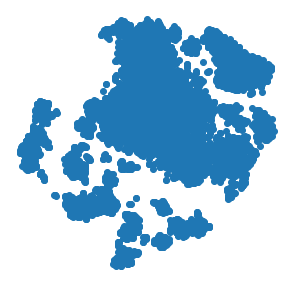

Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledianpairwise distances existing in the higher dimensional parameter space. How many clusters can you see in this embedding?A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, this is the only cxase in which you are allowed not to label your axes!


In [21]:
X_embedded = TSNE(n_components=2, random_state=345).fit_transform(X_scaled)
X_embedded.shape
pl.figure(figsize=(5,5))
pl.scatter(X_embedded[:,0], X_embedded[:,1])
pl.axis('off')
pl.show()
print("Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. " + 
      "The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: " + 
      "t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledian" + 
      "pairwise distances existing in the higher dimensional parameter space. " + 
      "How many clusters can you see in this embedding?" + 
      "A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, " + 
      "this is the only cxase in which you are allowed not to label your axes!")


We have to assure that the clusters map to the target variable tho. So I will redo the plot colorcoded by target variable

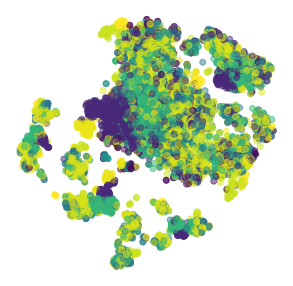

In [22]:
norm_obj= Normalize(vmin=y.min(), vmax=y.max())
len([c for c in pl.cm.RdBu_r(norm_obj(y))]), X_embedded.shape
pl.figure(figsize=(5,5))
pl.axis('off')
pl.scatter(X_embedded[:,0], X_embedded[:,1],  
           color=[c for c in pl.cm.viridis(norm_obj(y))], alpha=0.5);

Figure: the purity of the sample is not good in the t-SNE projection against the target variable. The colors are mixed in most t-SNE clusters, the highest purity is achieved near the center of the projected feature space. **This is not a particularly promising situation**

Does this map better on other features in the metadata?



**Deliverable II.2: make your version of the plot below, and discuss your own result, which will likely be somewhast different from mine. Do you see any other insightful mapping of the features in the t-SNE projection?**

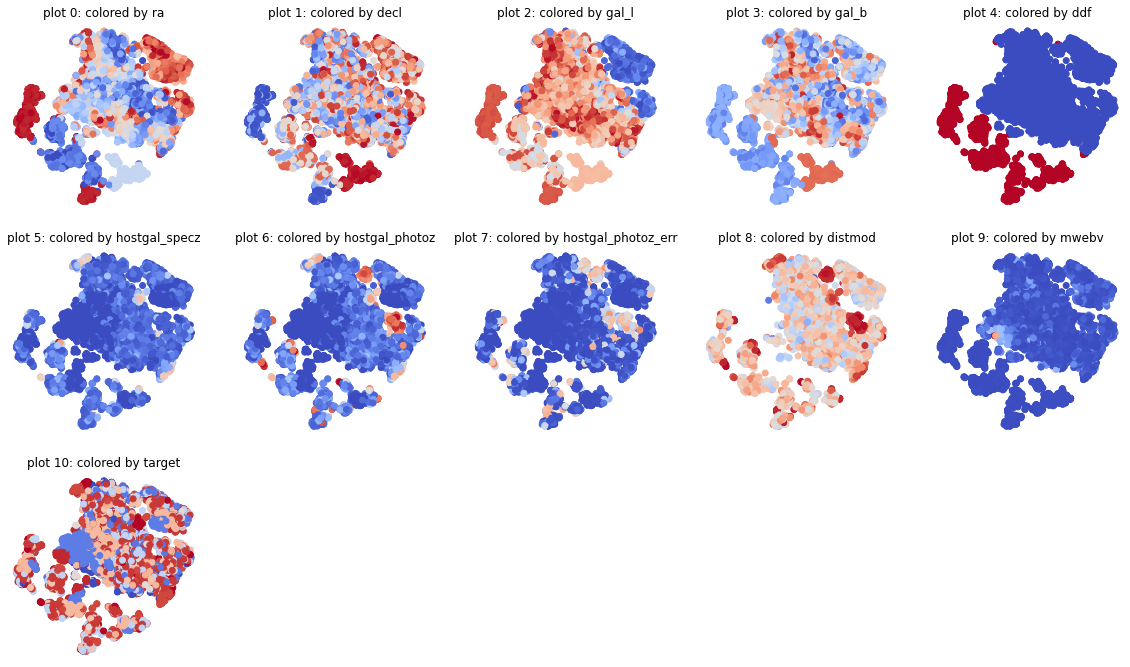

In [23]:
fig = pl.figure(figsize=(20,20))
# note: I am avoiding the first column of metadata which is the object identifier
for i, col in enumerate(metadata.columns[1:]):
    ax = fig.add_subplot(5,5,i+1)
    v = metadata[col].astype(float)
    ax.set_title("plot %d: colored by %s"%(i,col))
    ax.scatter(X_embedded[:,0], X_embedded[:,1],  
               color=[pl.cm.coolwarm(Normalize(vmin=v.min(), vmax=v.max())(c))
                                                         for c in v])
    ax.axis('off')

    #pl.show()

Figure : This figure represents the feature space of the allfeature data projected on a 2D plane using t-SNE method. The points are color-coded by the metadata values. The feature space does not completely map onto the metadata. This is able to be determined by the specific plots that have the representations of allfeatures evenly distributed across the feature space (e.g. column 1 row 1). Some features of the metadata however, are easily mapped such as ddf (i.e., column 5 row 1). Most other features map the t-SNE projection more poorly. 


# PART IIB : Clustering 
## cluster the data using Agglomerative and DBscan. 
    


In [0]:
from sklearn.cluster import AgglomerativeClustering


Here is how I could cluster the data using the Euclidian distance with Agglomeratie Clustering stoopping the algorithm at 3 clusters. The Eucledian distance is the default for this (and most other) clustering algorithms implemented in sklearn. 

- Note: I can use the Eucledian distance **because** I preprocessed the feature space and all features have the same standard deviation!* 

- Note: the AgglemerativeClustering implementation in python allows to specify the number of clusters (I will use 3): the agglomeration will stop there for efficiency, this is not the same as having to specify the number of clusters in k-means, where the result depends on the number of clusters. In agglomerative clustering the following clusters would be segmentations of the first 2. 



elements in cluster 0 5801
elements in cluster 1 1
elements in cluster 2 2046



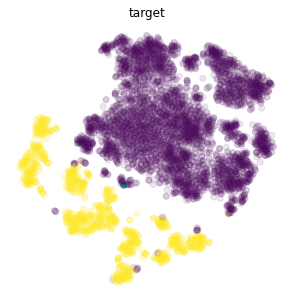

Figure: clustering the 75 dimensional feature space based on Agglomerateive Clustering algorithm with Eucledian distance into 3 clustersThere are 2 clusters of several observations, mapping excellently to the t-SNE projectionOne cluster of one indicates the presence of an outlier


In [26]:
clustering = AgglomerativeClustering(n_clusters=3).fit(X_scaled)

for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()
pl.figure(figsize=(5,5))
pl.title(col)

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()
print("Figure: clustering the 75 dimensional feature space based on " + 
      "Agglomerateive Clustering algorithm with Eucledian distance into 3 clusters" + 
     "There are 2 clusters of several observations, mapping excellently to the t-SNE projection" + 
     "One cluster of one indicates the presence of an outlier")



## TASK II.3:  Use AgglomerativeClustering in sklearn allows to select the number of cluster, run AgglomearativeCLustering with 2,3,4,5,6 clusters with Eucledian distance. Comment on the results.

**Deliverable II.3: plot the clusters obtained with AgglomerativeClustering with n_custer 2...6 and Eucledian distance, and comment on the result (mapping on t-SNE, outliers, consistence between the results obtained with different number of clusters)**


elements in cluster 0 7847



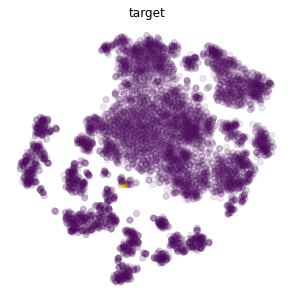

elements in cluster 1 1



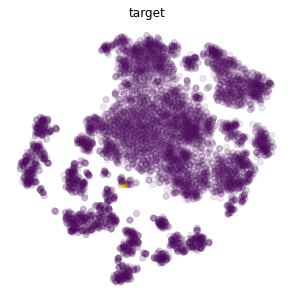

elements in cluster 0 5801



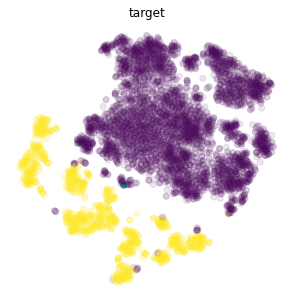

elements in cluster 1 1



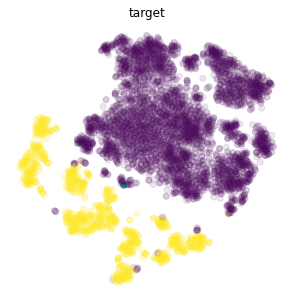

elements in cluster 2 2046



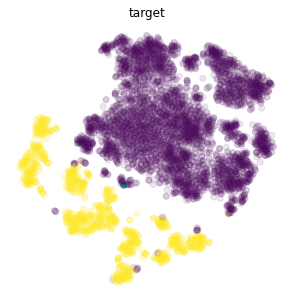

elements in cluster 0 5800



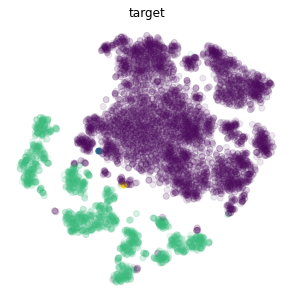

elements in cluster 1 1



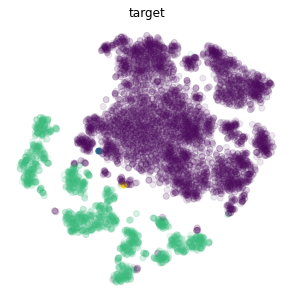

elements in cluster 2 2046



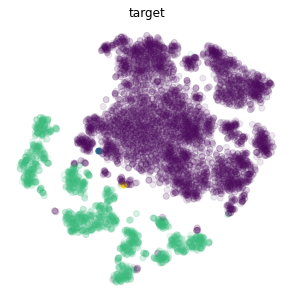

elements in cluster 3 1



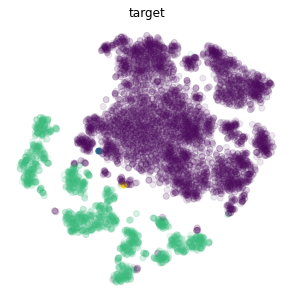

elements in cluster 0 4814



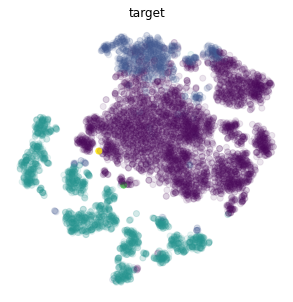

elements in cluster 1 986



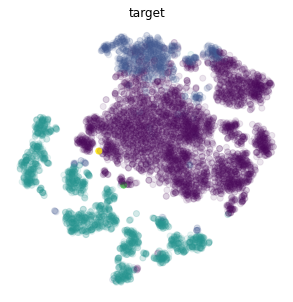

elements in cluster 2 2046



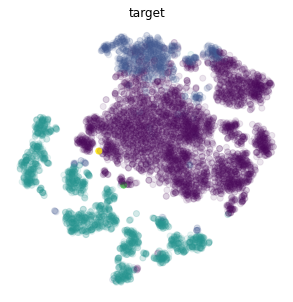

elements in cluster 3 1



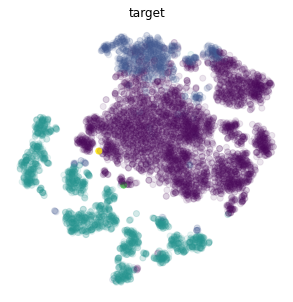

elements in cluster 4 1



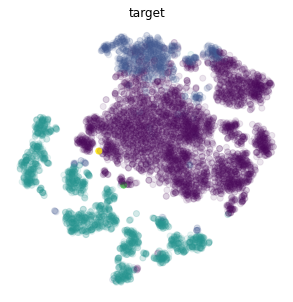

In [27]:
for n in range(2, 6):
  clustering = AgglomerativeClustering(n_clusters=n).fit(X_scaled)

  for j in range(n):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
    print()
    pl.figure(figsize=(5,5))
    pl.title(col)

    colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=n-1)(c))
                                                         for c in clustering.labels_])

    alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])

    colors[:,3] = alpha
    
    pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
    pl.axis('off')
    pl.show()



Figure: This figure represents clustering the dimensional feature space based on a varying number of clusters. One can tell that mapping all features onto one cluster does not adequately describe the feature space, but once more clusters are defined (e.g., 2 -3 clusters)the observations map well to the t-SNE projections. Once can also see outliers when a cluster with only one observation is present. An example of this is in cluter 1 1.


## let's take a look at outliers: in the AgglomerativeClustering (n_cluster=2) there is one outlier**

## Extra Credit 1: If you have clusters where you have single object in a cluster (e.g. in my Agglomerative Cluastering with n_cluster=2) try and figure out how why the object that is an outlier and isolated by your clustering model. 

I plotted all objects of the same type as the outlier in the 3-clusters result, but this was not very insightful. Can you do better?

## TASK II.4 what happens if I change the distance metric?

Create a new metric: precompute the braycurtis metric with scipy.spatial.distance.cdist and pass it to the accolmerative clustering with n_clusters=3 and affinity='precomputed'. Describe the result. Look online, on the documentation of scipy and on the any statistical resources (wikipedia has great pages on this) to describe the braycurtis distance.

**Deliverable: make a plot of the t-SNE projection colorcoded by the cluster obtained with the precomputed braycurtis distance and comment on whether it is consistent with the Eucledian distance clustering result.**

In [0]:
from scipy.spatial.distance import cdist

In [29]:
dist = cdist(X_scaled,X_scaled, metric='braycurtis')
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', 
                                    linkage="complete").fit(dist)
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))


elements in cluster 2 2797
elements in cluster 1 2981
elements in cluster 0 2070


elements in cluster 0 2070
elements in cluster 1 2981
elements in cluster 2 2797



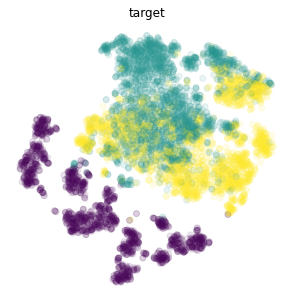

In [30]:
for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()
pl.figure(figsize=(5,5))
pl.title(col)

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_embedded[:,0], X_embedded[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()



Figure: This figure represents a plot of the t-SNE projections color coded by clusters obtained with the precomputed braycurtis distance. These results are similar to the Eucledian distance clustering result. The feature space representations are similar (although in the braycurtis distance version you can see how there is another defining feature in the top of the feature space that was not present with the Eucledian distance). Using the braycurtis distance also clearly indicates outliers like the previous features described. 

## Extra Credit II : Also cluster the original, not scaled features but use the Mahalanobis distance, which takes into account the variance of a feature and comment on the result. Is it consistent with the result using Eucledian distance on the scaled feature space

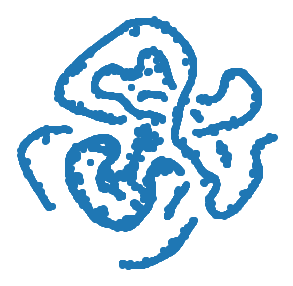

Figure: the 2D projection of the ~70-dimensional feature space we created by extracting features from the time series. The separation of the objects in the t-distribution based stocastic neighbourhood embedding (t-SNE) is promising: t-SNE is an embedding (a transformation to a different coordinate space) which is designed to preserve Eucledianpairwise distances existing in the higher dimensional parameter space. How many clusters can you see in this embedding?A note: since the t_SNE produces a projection of the feature space on an ideal set of coordinates, this is the only cxase in which you are allowed not to label your axes!


In [31]:
X_OG = TSNE(n_components=2, random_state=345).fit_transform(X)
X_OG.shape
pl.figure(figsize=(5,5))
pl.scatter(X_OG[:,0], X_OG[:,1])
pl.axis('off')
pl.show()


In [32]:
dist2 = cdist(X_OG,X_OG, metric='mahalanobis')
clustering = AgglomerativeClustering(n_clusters=3, affinity='precomputed', 
                                    linkage="complete").fit(dist2)
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))

elements in cluster 2 1532
elements in cluster 1 1340
elements in cluster 0 4976


elements in cluster 0 4976
elements in cluster 1 1340
elements in cluster 2 1532



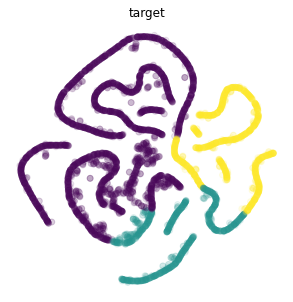

In [33]:
for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()
pl.figure(figsize=(5,5))
pl.title(col)

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_OG[:,0], X_OG[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()


## Extra Credit III: What happens if you change clustering strategy?
Cluster the features with DBScan. DBScan is the most cited clustering method. It is density based clustering: it allows you to specify a distance metric, and a minimum distance and number of neightbours within that distance for a point to be considered part of a cluster. Choose and justify your choice on the following parameters 
- eps: the maximum distance between two observations to be in the same cluster
- min_sample: the minimum number of neighbours a cluster needs to have to be a cluster (and not an outlier)



elements in cluster 2 1532
elements in cluster 1 1340
elements in cluster 0 4976
elements in cluster 0 4976
elements in cluster 1 1340
elements in cluster 2 1532



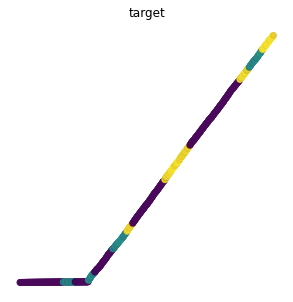

In [35]:
import sklearn
DBclustering = sklearn.cluster.DBSCAN(eps=.5, min_samples=5, metric='euclidean', 
                       metric_params=None, algorithm='auto', leaf_size=30).fit(X_scaled)
for j in range(2, -1, -1):
        print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))

for j in range(3):
    print("elements in cluster {} {}".format(j, (clustering.labels_ == j).sum()))
print()
pl.figure(figsize=(5,5))
pl.title(col)

#using a color map normalized according to the number of clusters:
# for 3 clusters vmin=0, vmax=2
colors = np.array([pl.cm.viridis(Normalize(vmin=0, vmax=2)(c))
                                                         for c in clustering.labels_])
# changing the alpha (transparency) based on the number of objects in the cluster or some clusters would not be visible
alpha = np.array([0.1 if (clustering.labels_ == j).sum() > 200 else 1.0 for j in clustering.labels_])
# setting the alpha channel by replacing the default of the colormap which is 1
colors[:,3] = alpha
    
pl.scatter(X_scaled[:,0], X_scaled[:,1], # alpha = alpha,
               color=colors);
pl.axis('off')
pl.show()


I chose a eps of .5 and a minimum sample of 5 based off of the literature (i.e., these were the most common values used in previous papers). 

# what have we learned?...
This was actually very helpful to understand that there are 2 surveys which split into 2 cluster under most cluster parameter choices. Other than that... I am not sure. And this happens a lot to me with clustering to be frank. 
- In many cases above (e.g. AgglomerativeClustering(n_clusters=3).fit(X_scaled) ) the clustring reflected a split that was obvious in the t-SNE visualization of the feature space: a large cluster on the top right of my plot, a more diffuse and structured cluster in the bottom left. This splits the deep drilling fields observations from the regular survey observations. It is good and it makes sense that we get that split, but it is not particularly insightful scientifically cause it tells us about the kind of observations we did, not the nature of the objects.

- In some cases clusters of one (in the Agglomarative clustering) or outliers are identified (DBscan) but in a 79-dimensioanl parameter space it is hard to see what that really means... why is a "outlier" different? In fact this challenge was purposefully designed to have no outliers in the training set (which is what we used) and have outliers in the test set. So our "outliers" should not be outliers. And if we change the parameters in the DBscan they are clustering changes indeed!




# PARTH IIB: Classifying:
Unlike clustering, classifying requires the existance of examples - we are learning by example how to spli tobervations among classes. We already prepared the train and test samples. 

Notice that tree methods do not require scaling or whitening! Why? because they deal with each feature one by one, so they make no assumption about covariance of features (until you try to do feature importance) **you can use the original X for the tree-based classification**

# TASK II.4 We will treat the 2 surveys separately: the general survey, and the deep drilling fields. 

splut the sample into DDF and normal and split each of those into training and test set

**Deliverable: 2 training and 2 test sets, one for DDF and one for the normal survey**



In [36]:
print("breakdown between surveys {} {}".format(
    (metadata.ddf == 1).sum(), (metadata.ddf == 0).sum()))

breakdown between surveys 2116 5732


In [0]:
Xddf = X[allfeatures2.ddf == 1]
Xnormal = X[allfeatures2.ddf == 0]
yddf =  y[allfeatures2.ddf == 1]
ynormal =  y[allfeatures2.ddf == 0]


In [38]:
print(allfeatures2.keys())

Index(['Unnamed: 0', 'object_id', '(0, 'mean')', '(0, 'std')', '(0, 'm2')',
       '(0, 'm3')', '(0, 'maxs')', '(0, 'mins')', '(0, 'median')',
       '(0, 'slopes')', '(0, 'intercepts')', '(0, 'll1')', '(0, 'll3')',
       '(1, 'mean')', '(1, 'std')', '(1, 'm2')', '(1, 'm3')', '(1, 'maxs')',
       '(1, 'mins')', '(1, 'median')', '(1, 'slopes')', '(1, 'intercepts')',
       '(1, 'll1')', '(1, 'll2')', '(1, 'll3')', '(2, 'mean')', '(2, 'std')',
       '(2, 'm2')', '(2, 'm3')', '(2, 'maxs')', '(2, 'mins')', '(2, 'median')',
       '(2, 'slopes')', '(2, 'intercepts')', '(2, 'll1')', '(2, 'll2')',
       '(2, 'll3')', '(3, 'mean')', '(3, 'std')', '(3, 'm2')', '(3, 'm3')',
       '(3, 'maxs')', '(3, 'mins')', '(3, 'median')', '(3, 'slopes')',
       '(3, 'intercepts')', '(3, 'll1')', '(3, 'll2')', '(3, 'll3')',
       '(4, 'mean')', '(4, 'std')', '(4, 'm2')', '(4, 'm3')', '(4, 'maxs')',
       '(4, 'mins')', '(4, 'median')', '(4, 'slopes')', '(4, 'intercepts')',
       '(4, 'll1')', '(4, 'l

then split training and test set

In [0]:
import sklearn
from sklearn.model_selection import train_test_split

X_trainddf, X_testddf, y_trainddf, y_testddf = train_test_split(
     Xddf, yddf, test_size=0.33, random_state=42)

X_trainnormal, X_testnormal, y_trainnormal, y_testnormal = train_test_split(
     Xnormal, ynormal, test_size=0.33, random_state=42)



## TASK II.5 Classification with Random Forest 
 Below I will use  RandomForest  to classify objects predicting "target" according to the "target" variable of the in the mtadata dataframe for both DDF and normal survey. 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
**Deliverable: comment on the score: what does the number I obtained mean?**

## TASK II.6 Use GradientBoosted trees to redo the same classification 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

**Deliverable: the score obtained solving the classification problem with the GBT model and a comparison of the score obtained with the RF**

In [0]:
from sklearn.ensemble import RandomForestClassifier
clfddf = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainddf, y_trainddf)
clfnormal = RandomForestClassifier(n_estimators=100, 
                        criterion='gini', max_depth=5).fit(X_trainnormal, y_trainnormal)



In [0]:
from sklearn.ensemble import GradientBoostingClassifier
clfddfGB = GradientBoostingClassifier(n_estimators=100, 
                        criterion='friedman_mse', max_depth=5).fit(X_trainddf, y_trainddf)
clfnormalGB = GradientBoostingClassifier(n_estimators=100, 
                        criterion='friedman_mse', max_depth=5).fit(X_trainnormal, y_trainnormal)

## measuring the classification performance by using the test score
**Deliverable: comment on the score: what does the number I obtained mean?**

In [42]:
print("Random Forest Classification\n" + 
       "score on DDF {:.2f} and on normal survey {:.2f}".format(
           clfddf.score(X_testddf, y_testddf),
           clfnormal.score(X_testnormal, y_testnormal)))

print("Gradient Boosted Trees Classification\n" + 
       "score on DDF {:.2f} and on normal survey {:.2f}".format(
           clfddfGB.score(X_testddf, y_testddf),
           clfnormalGB.score(X_testnormal, y_testnormal)))


Random Forest Classification
score on DDF 0.73 and on normal survey 0.60
Gradient Boosted Trees Classification
score on DDF 0.79 and on normal survey 0.71


The above scores indicate the classification accuracy on DDF and normal surveys. THe DDF survey has a higher classification rate than the normal survey using both the random forest and gradient boosted trees method. 


# Because this is a classification problem, we can build a confusion matrix

Confusion matrix, without normalization
Normalized confusion matrix


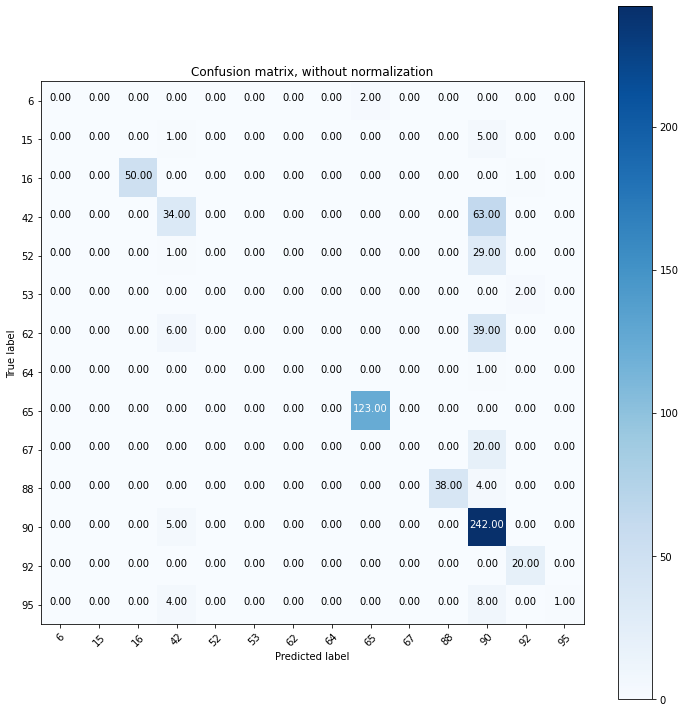

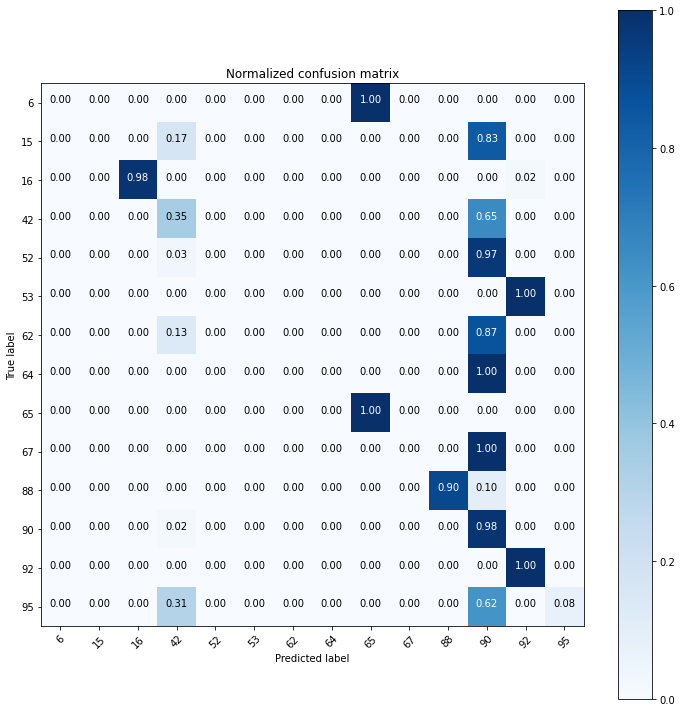

In [43]:
#https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "%.2f"%cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cnf_matrix = sklearn.metrics.confusion_matrix(y_testddf, clfddf.predict(X_testddf))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



Confusion matrix, without normalization
Normalized confusion matrix


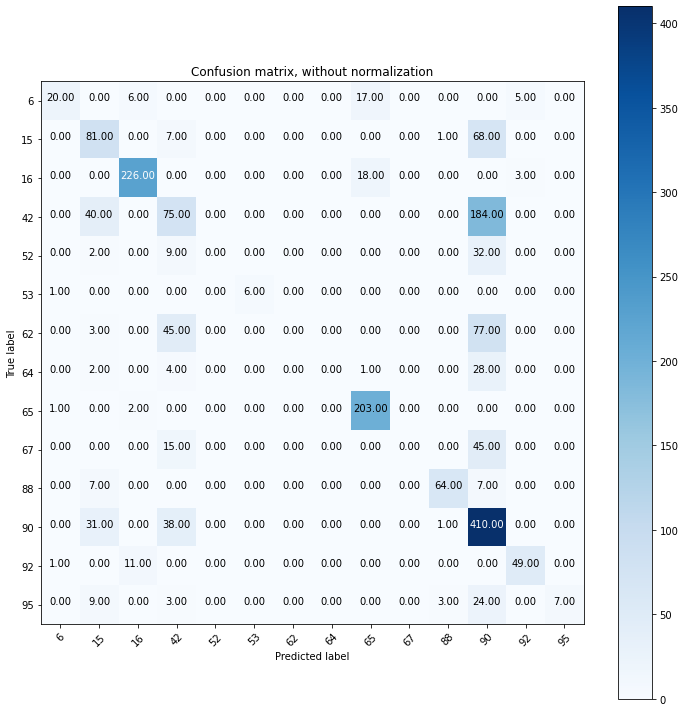

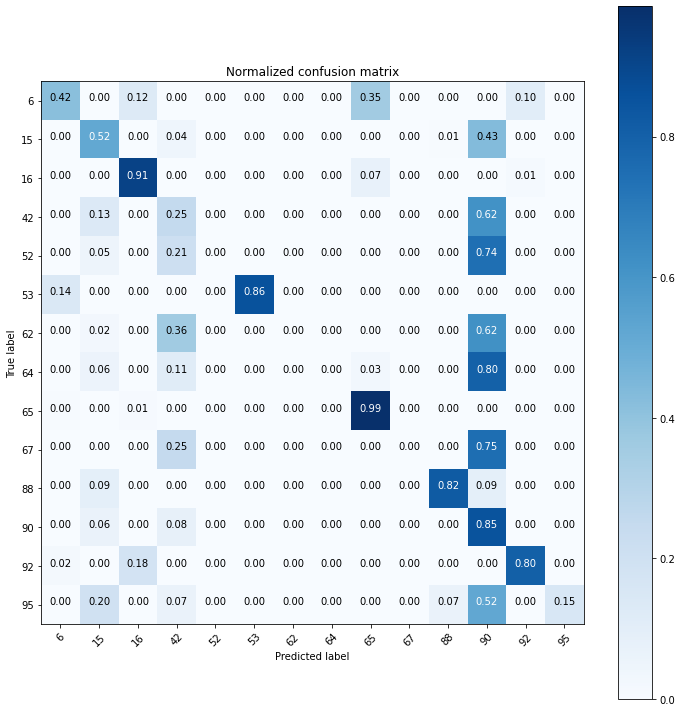

In [44]:
cnf_matrix = sklearn.metrics.confusion_matrix(y_testnormal, clfnormal.predict(X_testnormal))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()



# TASK II.7 take a stab at interpreting this. We will discuss in class how to read this properly on tuesday

Figure: The above four confusion matrices represent how many features are able to be accurately classified by the Random Forest Classifier. Each cell represnts the probability that that feature was accurately classified. For example, feature 6 in the normalized confusion matrix has a probability of 40% of being accurately classified.

# Extra Credit IV: build a confusion matrix for yout gradient boosted tree model and comment on the result

Confusion matrix, without normalization
Normalized confusion matrix


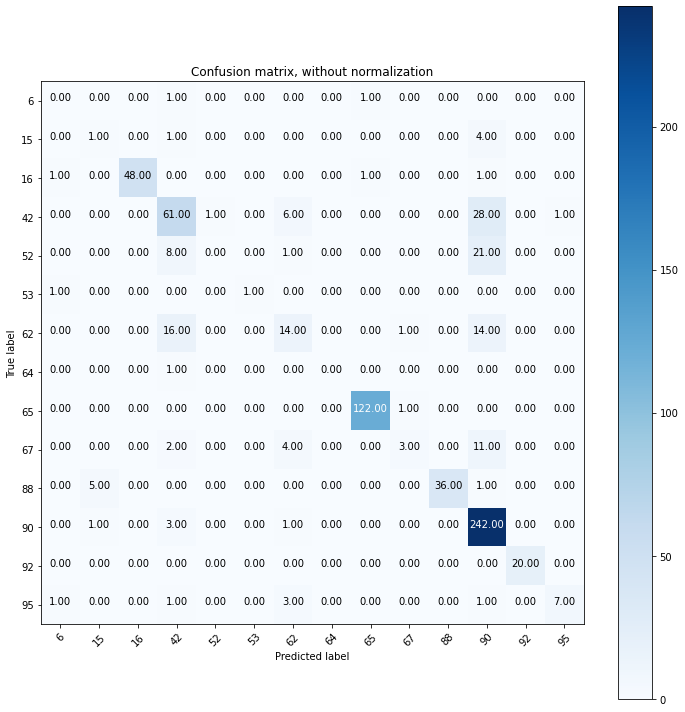

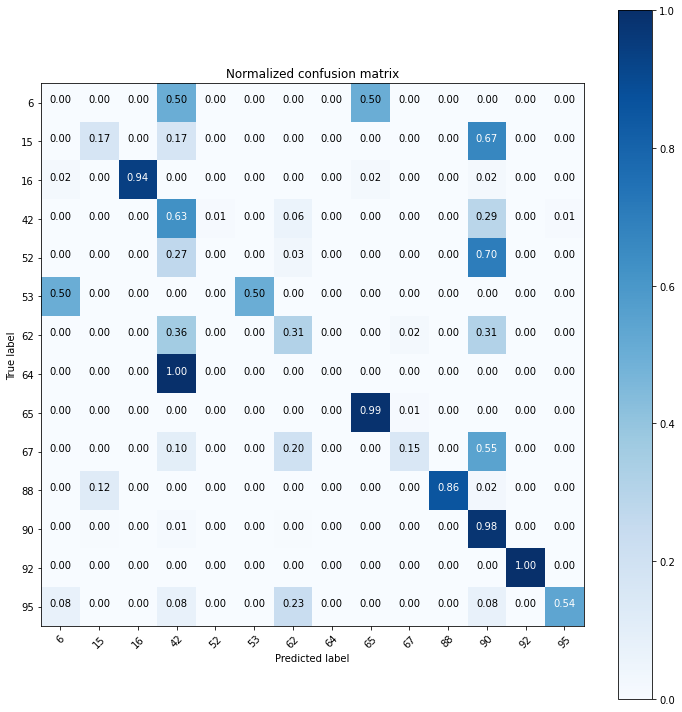

In [45]:
cnf_matrixGB = sklearn.metrics.confusion_matrix(y_testddf, clfddfGB.predict(X_testddf))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrixGB, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrixGB, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()


Confusion matrix, without normalization
Normalized confusion matrix


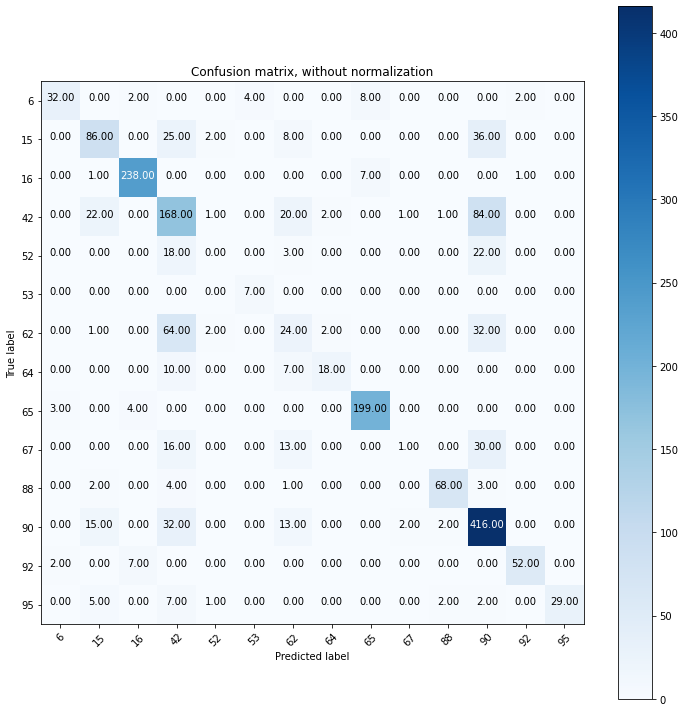

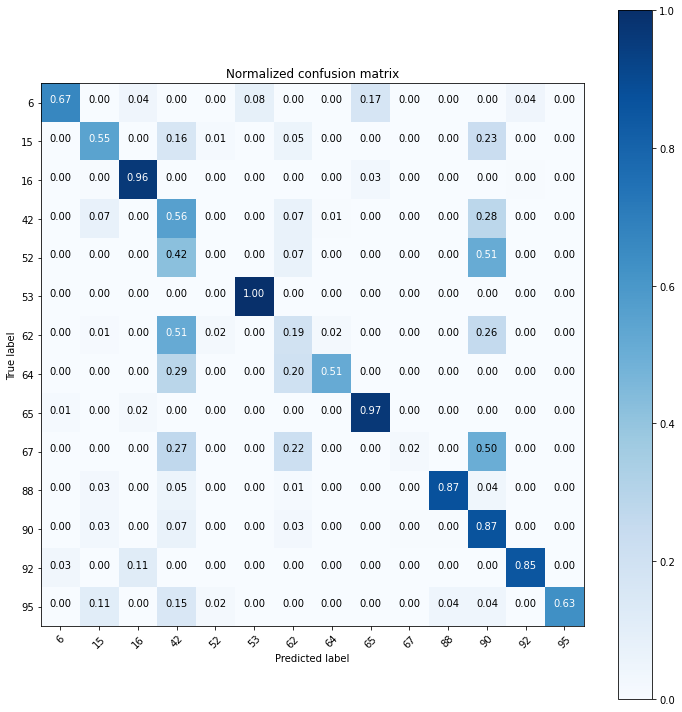

In [46]:
cnf_matrixGB2 = sklearn.metrics.confusion_matrix(y_testnormal, clfnormalGB.predict(X_testnormal))

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))

plot_confusion_matrix(cnf_matrixGB2, classes=["%d"%i for i in np.unique(y)],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrixGB2, classes=["%d"%i for i in np.unique(y)], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Figure: The above four confusion matrices represent how many features are able to be accurately classified by the Gradient Boosted Classifier. Each cell represnts the probability that that feature was accurately classified. For example, feature 6 in the normalized confusion matrix has a probability of 69% of being accurately classified. These numbers are higher than that of the Random Forest Classifier.